In [13]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
  
# fetch dataset 
ionosphere = fetch_ucirepo(id=52) 
  
# data (as pandas dataframes) 
X = ionosphere.data.features 
y = ionosphere.data.targets 
  
# metadata 
print(ionosphere.metadata) 
  
# variable information 
print(ionosphere.variables) 


{'uci_id': 52, 'name': 'Ionosphere', 'repository_url': 'https://archive.ics.uci.edu/dataset/52/ionosphere', 'data_url': 'https://archive.ics.uci.edu/static/public/52/data.csv', 'abstract': 'Classification of radar returns from the ionosphere', 'area': 'Physics and Chemistry', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 351, 'num_features': 34, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1989, 'last_updated': 'Sun Jan 01 1989', 'dataset_doi': '10.24432/C5W01B', 'creators': ['V. Sigillito', 'S. Wing', 'L. Hutton', 'K. Baker'], 'intro_paper': None, 'additional_info': {'summary': 'This radar data was collected by a system in Goose Bay, Labrador.  This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts.  See the paper for more details.  

In [3]:
print(len(X.columns))

34


In [6]:
X.head(5) # already normalized between [-1,1] as seen

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute25,Attribute26,Attribute27,Attribute28,Attribute29,Attribute30,Attribute31,Attribute32,Attribute33,Attribute34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


In [10]:
from sklearn.decomposition import PCA

#define PCA model to use
pca = PCA(n_components=len(X.columns))

#fit PCA model to data
pca_fit = pca.fit(X)

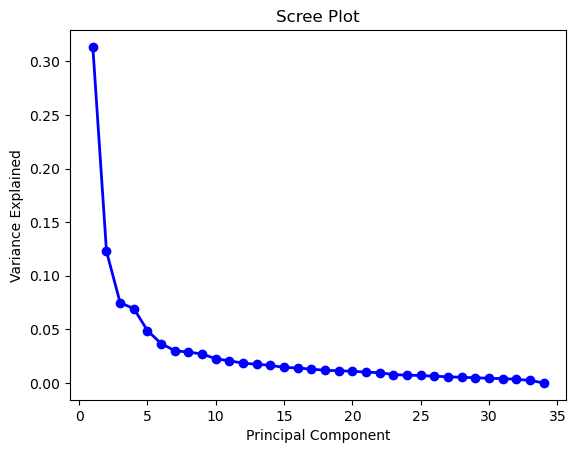

[3.13442567e-01 1.22715916e-01 7.47531588e-02 6.93713827e-02
 4.87451555e-02 3.67628972e-02 3.00194104e-02 2.87417744e-02
 2.70258301e-02 2.25412044e-02 2.06320031e-02 1.83866023e-02
 1.74260667e-02 1.64547193e-02 1.44493400e-02 1.39720397e-02
 1.28249614e-02 1.18505458e-02 1.13257238e-02 1.08961135e-02
 1.00825974e-02 9.50662790e-03 7.79732167e-03 7.23070868e-03
 6.96611126e-03 6.21700612e-03 5.76370177e-03 5.19643141e-03
 4.86322151e-03 4.29335970e-03 4.07318815e-03 3.36833665e-03
 2.30397592e-03 6.18156468e-32]


In [12]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

print(pca.explained_variance_ratio_)

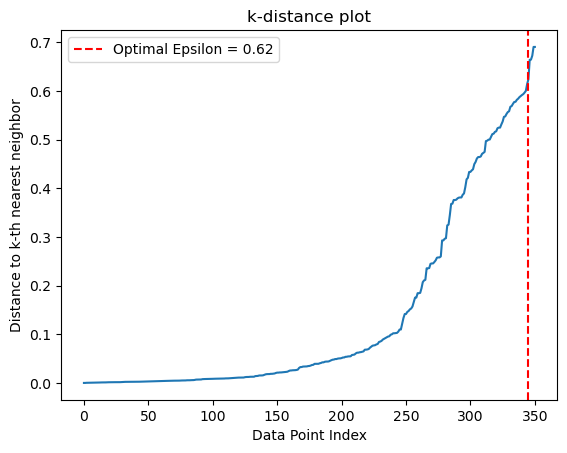

In [118]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=2, metric='cosine').fit(X)
distances, indices = nbrs.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

# Plot the k-distance graph
plt.plot(distances)
plt.title('k-distance plot')
plt.xlabel('Data Point Index')
plt.ylabel('Distance to k-th nearest neighbor')


# Find the optimal epsilon (knee point)
knee_point_index = np.argmax(np.diff(distances))  # Find the index with the maximum difference in distances
epsilon = distances[knee_point_index]
plt.axvline(x=knee_point_index, color='r', linestyle='--', label=f'Optimal Epsilon = {epsilon:.2f}')
plt.legend()

# Show the plot
plt.show()



In [62]:
from sklearn.cluster import DBSCAN

principalComponents = PCA(n_components=3).fit_transform(X)

principalDf = pd.DataFrame(data = principalComponents)
cluster = DBSCAN(eps=epsilon).fit(principalDf)

In [65]:
principalDf.columns=['PCA1','PCA2','PCA3']
principalDf

,PCA1,PCA2,PCA3
0,-0.859333,-0.961407,-0.586082
1,0.765524,-1.062714,-1.397339
2,-1.116817,-0.392256,0.007988
3,0.981679,0.590445,0.478505
4,0.132848,-0.788272,-0.714253
...,...,...,...
346,-1.812768,-0.085462,0.222245
347,-2.047168,0.064722,0.374502
348,-2.009686,0.007021,0.345604
349,-1.878506,-0.258263,0.279973


In [63]:
import collections
print(collections.Counter(cluster.labels_))

Counter({0: 251, -1: 50, 1: 32, 2: 18})


C:\Users\Anu2001\AppData\Local\Temp\ipykernel_2712\188791831.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('viridis', 2)


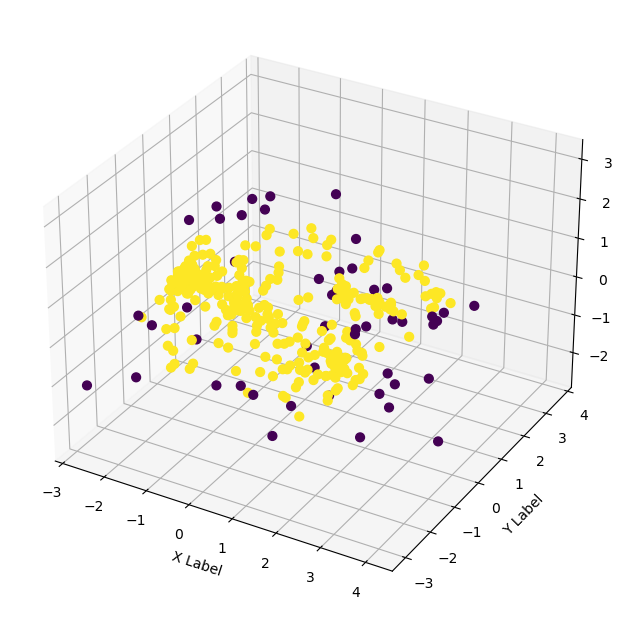

In [117]:

# clustering = DBSCAN().fit(project2D)
import seaborn as sns
import numpy as np


from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap


# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = plt.cm.get_cmap('viridis', 2) 
x = principalDf['PCA1']
y = principalDf['PCA2']
z = principalDf['PCA3']

# plot
ax.scatter(x, y, z, s=40, c=np.array(cluster.labels_)>-1, marker='o', cmap=cmap, alpha=1)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
# legend
#plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

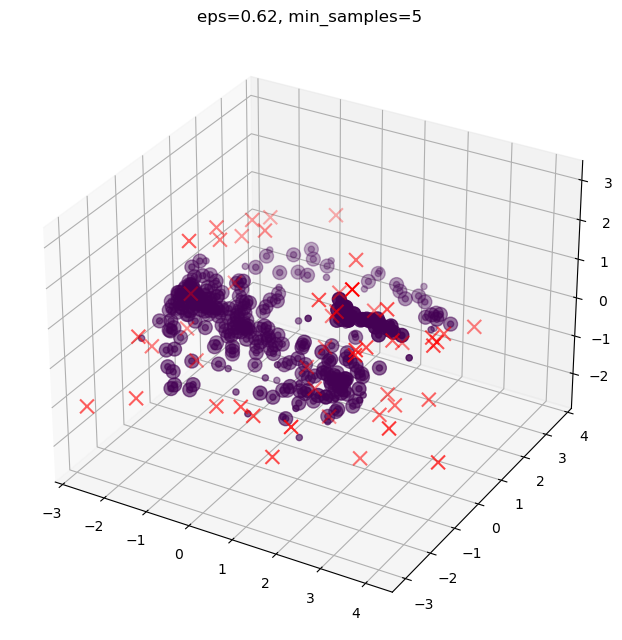

In [119]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    bool_labels = dbscan.labels_>-1
    core_mask = np.zeros_like(bool_labels, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = bool_labels == 0
    non_core_mask = ~(core_mask | anomalies_mask)

    
    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]

    # axes instance
    fig = plt.figure(figsize=(6,6))
    ax = Axes3D(fig, auto_add_to_figure=False)
    fig.add_axes(ax)
    ax.scatter(cores[:, 0], cores[:, 1], cores[:, 2],
                c=bool_labels[core_mask], marker='o', s=size)
    ax.scatter(cores[:, 0], cores[:, 1], cores[:, 2], marker='o', s=20,
                c=bool_labels[core_mask])
    ax.scatter(anomalies[:, 0], anomalies[:, 1], anomalies[:, 2],
                c="r", marker="x", s=100)
    ax.scatter(non_cores[:, 0], non_cores[:, 1], non_cores[:, 2],
                c=bool_labels[non_core_mask], marker="o")

    plt.title(f"eps={dbscan.eps:.2f}, min_samples={dbscan.min_samples}")
    plt.grid()
    plt.gca().set_axisbelow(True)

dbscan = DBSCAN(eps=epsilon)
dbscan.fit(principalDf)

plot_dbscan(dbscan, principalDf.to_numpy(), size=100)



In [73]:
principalDf['labels'] = cluster.labels_ > -1

c:\Users\Anu2001\anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


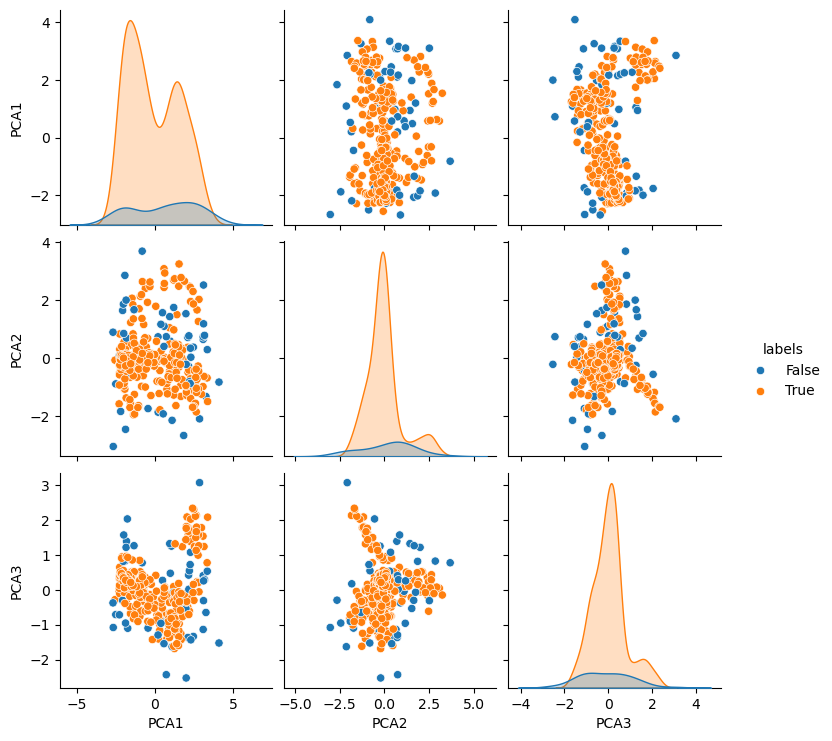

In [75]:
sns.pairplot(data=principalDf, hue='labels')